In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grad(x):
    return 2*x + 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(grad, x0, eta):
    x = [x0]
    for i in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3: # a small number
            break
        x.append(x_new)
    return (x, i)

### change starter point

In [63]:
(x1, it1) = myGD1(grad, -5, .1)
(x2, it2) = myGD1(grad, 5, .1)
print('solution x1 = %f, cost = %f, after %d iterations' % (x1[-1], cost(x1[-1]), it1))
print('solution x2 = %f, cost = %f, after %d iterations' % (x2[-1], cost(x2[-1]), it2))

solution x1 = -1.110667, cost = -3.246394, after 11 iterations
solution x2 = -1.110341, cost = -3.246394, after 29 iterations


In [3]:
def draw_gd1d(x1, ids, filename, nrows=2, ncols=4, start=-5.5):
    x0 = np.linspace(start, 5.5, 1000)
    y0 = cost(x0)
    width = 4*ncols
    height = 4*nrows

    plt.close('all')
    fig, axs = plt.subplots(nrows, ncols, figsize=(width, height))

    for i, k in enumerate(ids):
        r = i//ncols
        c = i % ncols

        x = x1[ids[i]]
        y = cost(x)
        str0 = 'iter {}/{}, grad = {:.3f}'.format(ids[i], len(x1)-1, grad(x))

        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize=13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[r, c].plot()
            axs[r, c].tick_params(axis='both', which='major', labelsize=13)
        else:
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize=13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[c].plot()
            axs[c].tick_params(axis='both', which='major', labelsize=13)
    plt.savefig(filename, bbox_inches='tight', dpi=200)
    plt.show()

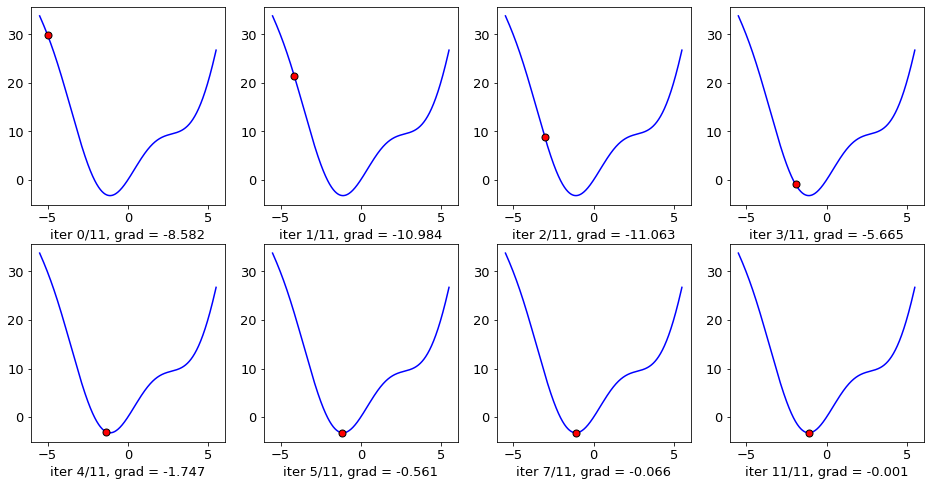

In [65]:
# good learning rate 
filename = 'gd1d_0.png'
(x1, it0) = myGD1(grad, -5, .1)
ids = [0, 1, 2, 3, 4, 5, 7, 11]
draw_gd1d(x1, ids, filename)

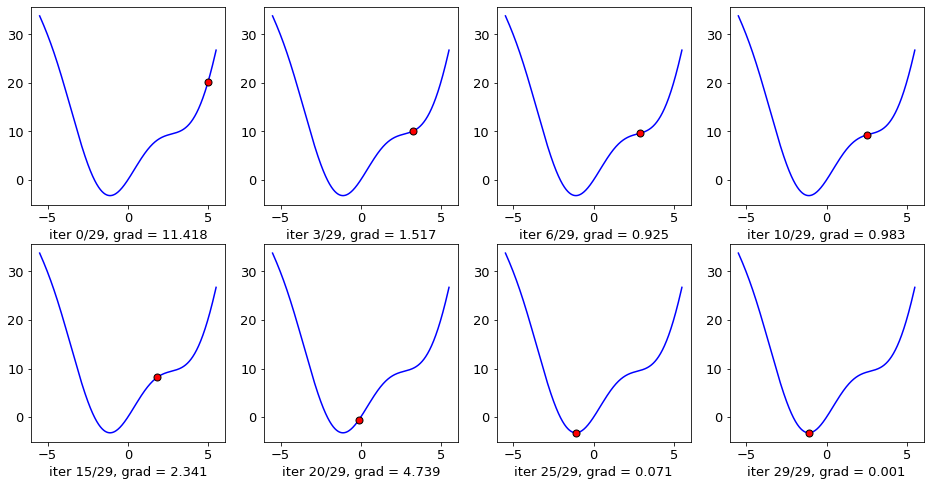

In [66]:
# good learning rate 
filename = 'gd1d_1.png'
(x1, it0) = myGD1(grad, 5, .1)
ids = [0, 3, 6, 10, 15, 20, 25, 29]
draw_gd1d(x1, ids, filename)

### change learning rate

In [67]:
(x3, it1) = myGD1(grad, -5, .01)
(x4, it2) = myGD1(grad, -5, .5)
print('solution x3 = %f, cost = %f, after %d iterations' % (x3[-1], cost(x3[-1]), it1))
print('solution x4 = %f, cost = %f, after %d iterations' % (x4[-1], cost(x4[-1]), it2))

solution x3 = -1.117990, cost = -3.246213, after 99 iterations
solution x4 = -0.063061, cost = -0.311118, after 99 iterations


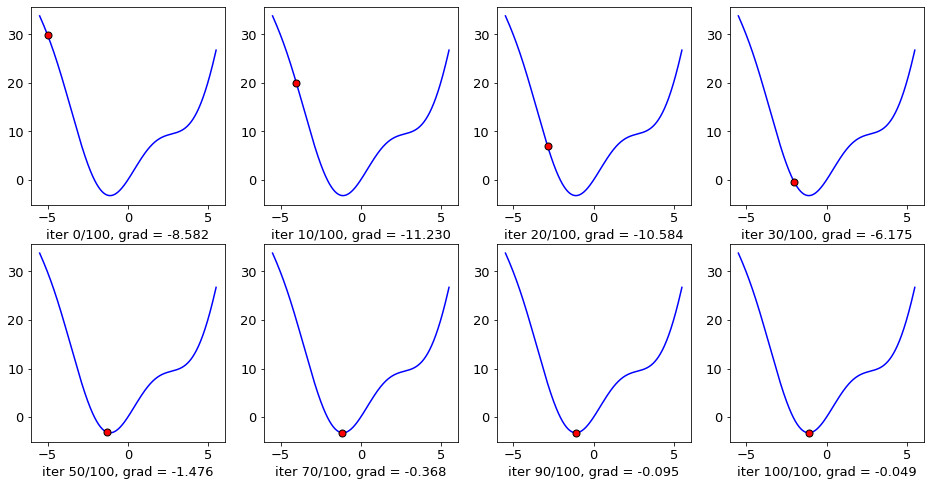

In [68]:
# small learning rate
filename = 'gd1d_2.png'
(x1, it0) = myGD1(grad, -5, .01)
ids = [0, 10, 20, 30, 50, 70,  90, 100]
draw_gd1d(x1, ids, filename)

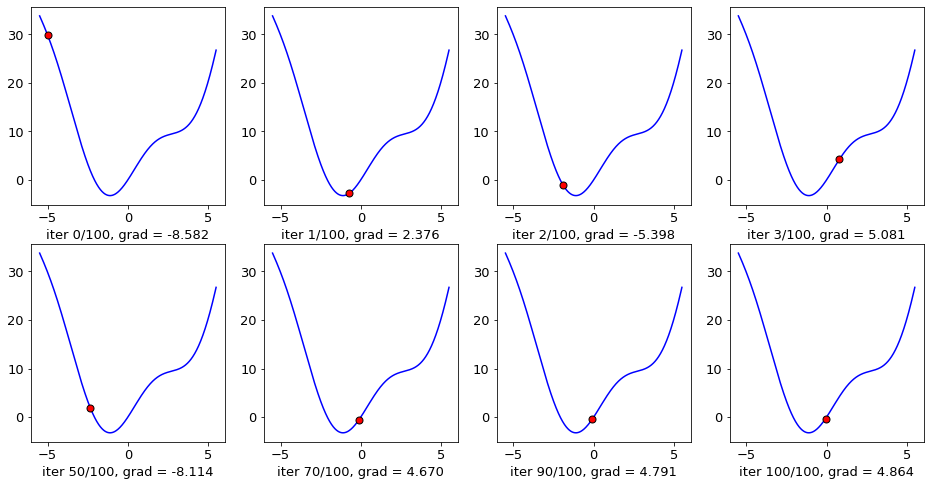

In [69]:
# large learning rate 
filename = 'gd1d_3.png'
(x1, it0) = myGD1(grad, -5, .5)
ids = [0, 1, 2, 3, 50, 70,  90, 100]
draw_gd1d(x1, ids, filename)

# gradient descent cho bài toán linear regression

In [4]:
from sklearn.linear_model import LinearRegression
X = np.random.rand(1000, 1)
y = 4 + 3*X + .5*np.random.randn(1000, 1) # noise added
model = LinearRegression()
model.fit(X, y)
w, b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b, w])
print(sol_sklearn)

[4.05458214 2.89899778]


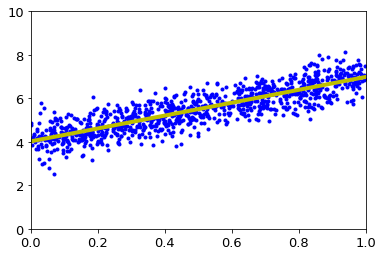

In [71]:
# Draw the fitting line
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w*x0 + b
filename = 'LR_data.png'
plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(X, y, 'b.')     # data
plt.plot(x0, y0, 'y', linewidth=4)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.savefig(filename, bbox_inches='tight', dpi=200)
plt.show()

### tìm bằng gd

In [21]:
ones = np.ones((X.shape[0], 1))
Xbar = np.concatenate((ones, X), axis=1)
N = Xbar.shape[0]

In [22]:
def grad(w):
    return 1/N * Xbar.T.dot(Xbar.dot(w)-y)

def cost(w):
    return .5/N * (np.linalg.norm(y-Xbar.dot(w))**2)

In [20]:
def check_grad(fn, gr, X):
    X_flat = X.reshape(-1)
    shape_X = X.shape
    num_grad = np.zeros_like(X)
    grad_flat = np.zeros_like(X_flat)
    eps = 1e-6
    numElems = X_flat.shape[0]
    for i in range(numElems):
        Xp_flat = X_flat.copy()
        Xn_flat = X_flat.copy()
        Xp_flat[i] += eps
        Xn_flat[i] -= eps
        Xp = Xp_flat.reshape(shape_X)
        Xn = Xn_flat.reshape(shape_X)
        grad_flat[i] = (fn(Xp) - fn(Xn)) / (2*eps)
    
    num_grad = grad_flat.reshape(shape_X)
    diff = np.linalg.norm(num_grad - gr(X))
    print('Difference between two methods should be small:', diff)

In [75]:
check_grad(cost, grad, np.random.randn(2).reshape(2, -1))

Difference between two methods should be small: 1.3581396872302053e-09


In [8]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for i in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
            break
        w.append(w_new)
    return w, i

In [23]:
w_init = np.array([[2], [1]])
w1, it1 = myGD(w_init,grad, 1)
print('Sol found by GD: w = ', w1[-1].reshape(-1), ',\nafter %d iterations.' %(it1+1))

Sol found by GD: w =  [4.06910745 2.87215318] ,
after 46 iterations.


### visualize

In [9]:
import matplotlib
import matplotlib.pyplot as plt

N = X.shape[0]

# compute pars for ellipse
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N
e1 = -2*X.T.dot(y)/N

delta = 0.025
xg = np.arange(1.5, 6.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
# Z = np.linalg.norm(Xg*Xbar[:, 0] + Yg*Xbar[:, 1] - y)**2
Z = a1 + Xg**2 + b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg


def lr_gd_draw(w1, filename):
    w_hist = np.array(w1)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.cla()
    plt.axis([1.5, 6, 0.5, 4.5])
    plt.tick_params(axis='both', which='major', labelsize=13)
    CS = plt.contour(Xg, Yg, Z, 100)
    plt.plot(w_hist[:, 0], w_hist[:, 1], marker='o',
             color='r', linestyle='-', markeredgecolor='k')
    plt.plot(b, w, 'go')
    plt.plot(w_hist[0, 0], w_hist[0, 1], 'bo')
    str0 = '%d iterations' % w_hist.shape[0]
    plt.title(str0)
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

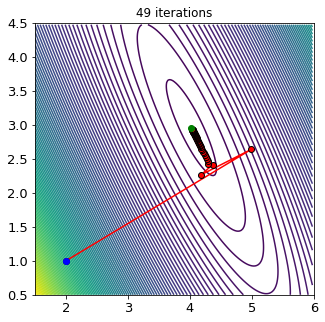

In [79]:
lr_gd_draw(w1, 'LR_gd_1.png')

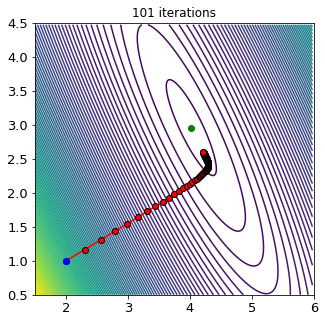

In [80]:
w2, it1 = myGD( w_init, grad, .1)
lr_gd_draw(w2, 'LR_gd_2.png')

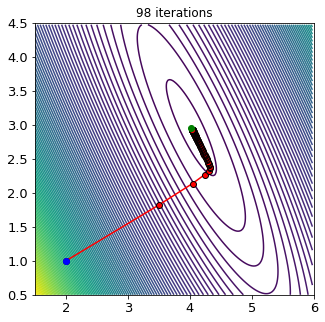

In [81]:
w3, it1 = myGD( w_init, grad, .5)
lr_gd_draw(w3, 'LR_gd_3.png')

# GD with momentum

In [10]:
def GD_momentum(grad, theta_init, eta, gamma):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for i in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) / np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta

In [11]:
def grad(X):
    return 2*X + 10*np.cos(X)

def cost(X):
    return X**2 + 10*np.sin(X)

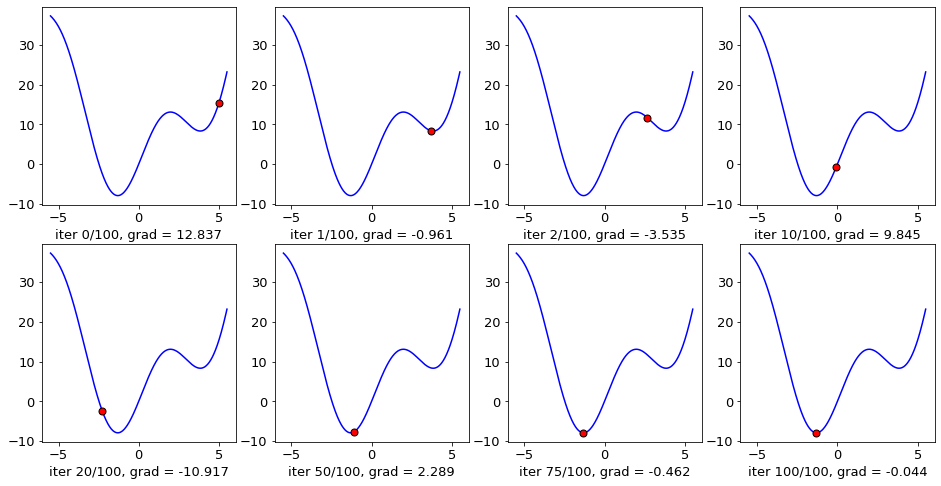

In [84]:
# good learning rate 
filename = 'gd1d_momentum_0.png'
# (x1, it0) = myGD1(-5, .1)
thetas = GD_momentum(grad, 5, 0.1, 0.9)
ids = [0, 1, 2, 10, 20, 50, 75, 100]
draw_gd1d(thetas, ids, filename)

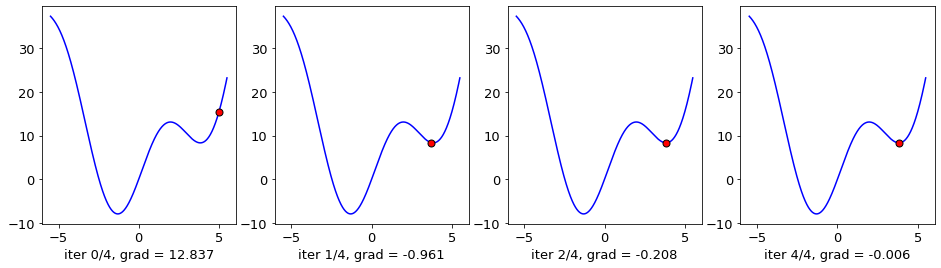

In [85]:
# without momentum
filename = 'gd1d_no_momentum.png'
(x1, it0) = myGD1(grad, 5, .1)
# thetas = GD_momentum(5, grad, 0.1, 0.9)
ids = [0, 1, 2, 4]
draw_gd1d(x1, ids, filename, 1, 4)

# GD with NAG

In [13]:
def GD_NAG(grad, theta_init, eta, gamma):
    theta = [theta_init]
    v = [np.zeros_like(theta_init)]
    for i in range(100):
        v_new = gamma*v[-1] + eta*grad(theta[-1] - gamma*v[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) / np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v.append(v_new)
    return theta

bài toán linear regression

In [27]:
w_init = np.array([[2], [1]])
def grad(w):
    return 1/N * Xbar.T.dot(Xbar.dot(w)-y)

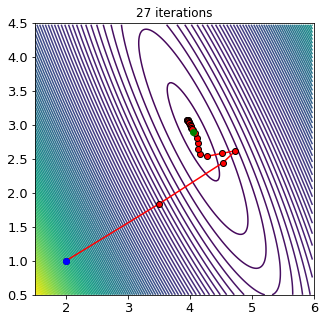

In [30]:
theta = GD_NAG(grad, w_init, 0.5, 0.9)
lr_gd_draw(theta, 'LR_NAG.png')

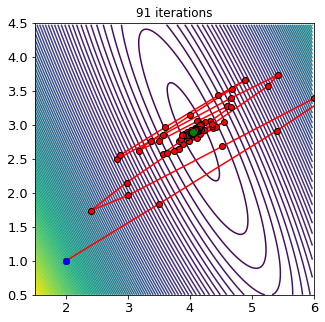

In [31]:
theta = GD_momentum(grad, w_init, 0.5, 0.9)
lr_gd_draw(theta, 'LR_momentum.png')